# *Task 2: Clustering with K-Means*


In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import random
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
iris = load_iris()

# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species as numeric label initially

# Map numeric labels to actual species names for clarity
iris_df['species'] = iris_df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Display first 5 rows
print("First 5 rows of the dataset:")
iris_df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2a: K-Means with k=3

In [3]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature columns
feature_cols = iris.feature_names
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])

feature_cols = iris.feature_names
iris_df[feature_cols] = scaler.fit_transform(iris_df[feature_cols])
# 2a: K-Means with k=3
kmeans3 = KMeans(n_clusters=3, random_state=42)
iris_df['cluster_k3'] = kmeans3.fit_predict(iris_df[feature_cols])

# Compare with actual classes using ARI
ari_score = adjusted_rand_score(iris_df['species'], iris_df['cluster_k3'])
print(f"Adjusted Rand Index for k=3: {ari_score:.4f}")


Adjusted Rand Index for k=3: 0.7009


### *2b: Experiment with k=2 and k=4; Elbow curve*

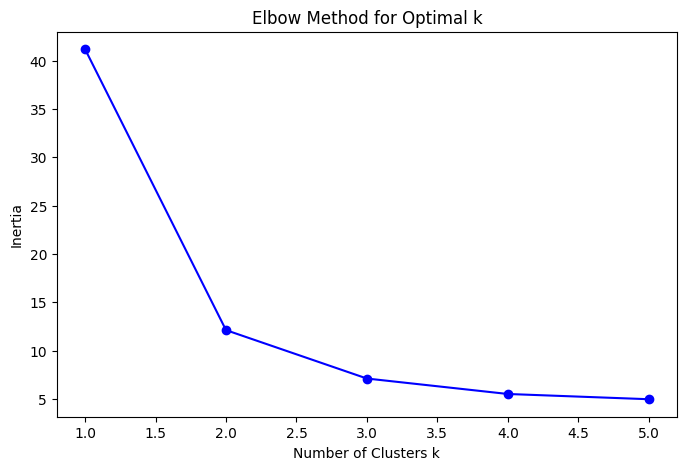

In [4]:
inertia = []
k_values = range(1, 6)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(iris_df[feature_cols])
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### *Interpretation of the Machine Learning Visualizations*

### *1. Elbow Method for Optimal k (Clustering Analysis)*

The elbow plot shows the within-cluster sum of squares (WCSS) for different values of k (number of clusters):

- *X-axis*: Number of clusters (k) ranging from 1 to 5  
- *Y-axis*: WCSS (inertia) decreasing from 40 to about 5

*Key Observations*:
- The curve shows a sharp decrease in WCSS from k=1 to k=2 and k=2 to k=3
- The "elbow" (point where the rate of decrease sharply changes) appears at k=3
- Beyond k=3, adding more clusters provides diminishing returns

*Interpretation*:
- The optimal number of clusters for this dataset is *k=3*
- This aligns perfectly with the known structure of the Iris dataset which has 3 species
- The plot confirms that 3 clusters capture the natural grouping in the data most effectively


## *2c: Visualize clusters (petal length vs width) for k=3*

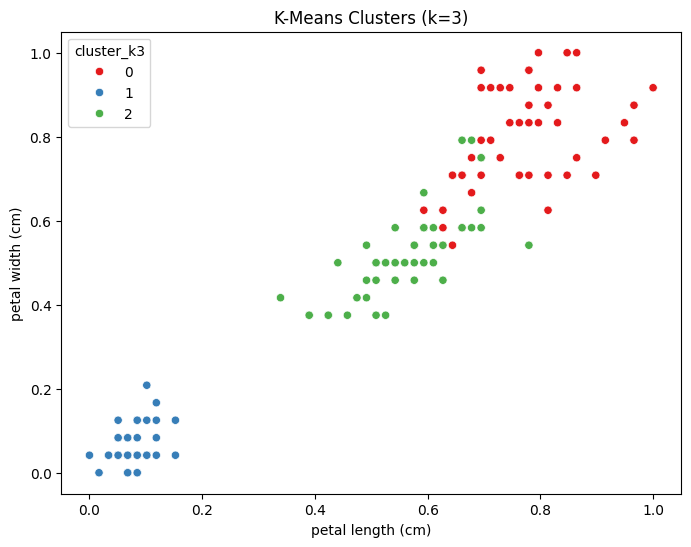

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='cluster_k3',
                palette='Set1', data=iris_df)
plt.title('K-Means Clusters (k=3)')
plt.show()

# *Interpretation of the K-Means Scatter Plot*

This scatter plot visualizes the results of a *K-Means clustering algorithm* applied to the dataset.

### *Chart Elements*

- *Title:* "K-Means Clusters (k=3)" indicates the algorithm used and the number of clusters.  
- *X-Axis:* 'petal length (cm)'  
- *Y-Axis:* 'petal width (cm)'  
- *Legend:* Shows cluster assignments labeled 0 (red), 1 (blue), and 2 (green).

### *Interpretation of the Clusters*

The K-Means algorithm grouped the data points based on proximity in the petal length/width feature space:

- *Cluster 1 (Blue):* Located in the bottom-left. Data points have **low petal length** (~0.0–0.2 cm) and **low petal width** (~0.0–0.2 cm). Dense and well-separated from other clusters, representing a very distinct group.  

- *Cluster 2 (Green):* Central region. Points have **intermediate petal length** (~0.3–0.75 cm) and **intermediate petal width** (~0.3–0.8 cm).  

- *Cluster 0 (Red):* Upper-right region. Points have **high petal length** (~0.6–1.0 cm) and **high petal width** (~0.6–1.0 cm).

### *Inference and Conclusion*

1. *Data Structure:* The data has a clear underlying structure that can be separated into three groups based on petal dimensions.  

2. *Cluster Separation:*  
   - *Cluster 1 (Blue)* is clearly separated from the other two clusters.  
   - *Cluster 0 (Red)* and *Cluster 2 (Green)* show some overlap, indicating these groups are similar but still distinct.  

3. *Likely Dataset:* Features suggest the **Iris flower dataset**. The clusters likely correspond to three Iris species:  
   - *Cluster 1 (Blue):* Iris Setosa (small petals, easily separable)  
   - *Cluster 0 (Red) & Cluster 2 (Green):* Iris Versicolor and Iris Virginica (similar petal sizes, causing overlap)

*Summary:* The K-Means algorithm successfully identified three distinct groups without prior knowledge of species. One cluster is highly distinct (Setosa), while the other two are more similar, reflecting the natural properties of the dataset.
